In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
import seaborn as sns


In [10]:
class NaiveBayes:
    """
    implementation of Naive Bayes for classification tasks.
    """

    def __init__(self):
        """ 
        Initializes the parameters for naive bayes model.
        """
        self._mean=None
        self._var=None
        self._priors=None
        self._classes=None
    def fit(self,X,y):
        """
        Fits the training data to model

        Parameter:
        X:Training Data(n_samples*n_features)
        y=Target Labels(n_samples)
        """
        # get the dimensions from X.shape()
        n_samples,n_features=X.shape
        # getting all the classes the classifier and classify into 
        self._classes=np.unique(y)
        n_classes=len(self._classes)

        #Initialize mean, var, priors for every class
        self._mean=np.zeros((n_classes,n_features),dtype=np.float64)
        self._var=np.zeros((n_classes,n_features),dtype=np.float64)
        self._priors=np.zeros(n_classes,dtype=np.float64)
        
        #time to calculate mean, var, priors for each class
        for c in self._classes:
            X_c=X[c==y]#all the samples that belongs to c

            self._mean[c,:]=X_c.mean(axis=0)
            self._var[c,:]=X_c.var(axis=0)
            self._priors[c]=X_c.shape[0]/float(n_samples)

    def predict(self,X):
        """ 
        predicts the label  for  the input X
        """
        y_pred=[self._predict(x) for x in X]

        return y_pred

    def _predict(self,X):
        """
        predicts the class for a single data point
        """    
        posteriors=[]

        for idx,c in enumerate(self._classes):
            # prior for class c
            prior=np.log(self._priors[idx])
            ##likelihood
            class_conditional=np.sum(np.log(self._pdf(idx,X)))
            # posterior=Prior+likelihood( log scale to avoid underflow)
            posterior= prior+class_conditional
            posteriors.append(posterior)
        
        # return the posterior class with higher probability
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self,class_idx,X):
        """ 
        calculate the pdf for the gaussian distribution.
        """

        mean=self._mean[class_idx]
        var=self._var[class_idx]
        #Gaussian PDF
        numerator=np.exp(-(X-mean)**2/(2*var))
        denominator=np.sqrt(2*np.pi*var)
        return numerator/denominator

In [11]:
def accuracy(y_true,y_pred):
    """ 
    calculate the accuracy for the predictions made.
    """
    return np.sum(y_pred==y_true)/len(y_true)

In [12]:
#making the dataset
X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#initializing the model
nb=NaiveBayes()
nb.fit(X_train,y_train)

In [14]:
#make predictions on the test set
predictions=nb.predict(X_test)

In [15]:
acc_score=accuracy(y_test,predictions)
print(f"NB classification accuracy: {acc_score:.4f}")

NB classification accuracy: 0.8100


In [18]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[77 12]
 [26 85]]


In [19]:
cr = classification_report(y_test, predictions)
print("\nClassification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        89
           1       0.88      0.77      0.82       111

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



In [20]:
def plot_confusion_matrix(cm, classes):
    """
    Plot the confusion matrix.

    Parameters:
    cm (ndarray): Confusion matrix
    classes (list): Class labels
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Labels and titles
    ax.set_xticklabels([''] + classes)
    ax.set_yticklabels([''] + classes)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Display the matrix values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

    plt.title('Confusion Matrix')
    plt.show()

/tmp/ipykernel_8497/1361251239.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes)
/tmp/ipykernel_8497/1361251239.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes)


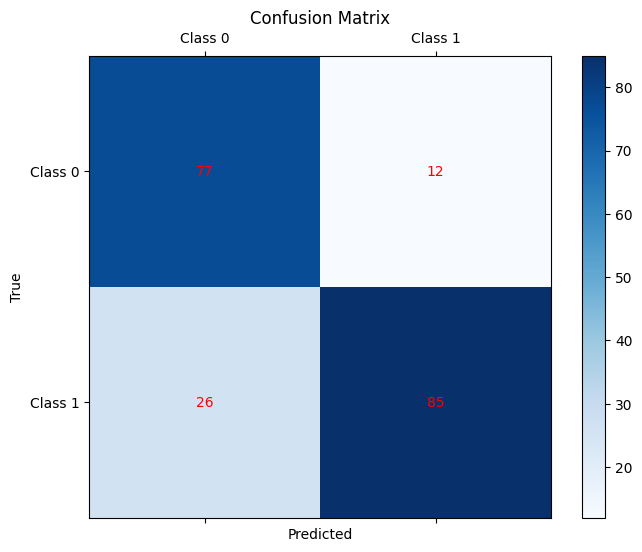

In [21]:
# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'])

In [26]:
#Visualize feature importance by looking at feature's means and variances
def plot_feature_distribution(X, y, feature_idx):
    """
    Visualize the distribution of a given feature for each class.

    Parameters:
    X : Dataset (n_samples * n_features)
    y : Target labels
    feature_idx: Index of the feature to visualize
    """
    plt.figure(figsize=(10, 6))
    for c in np.unique(y):
        plt.hist(X[y == c, feature_idx], bins=20, alpha=0.5, label=f'Class {c}')
    plt.title(f'Distribution of Feature {feature_idx} by Class')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

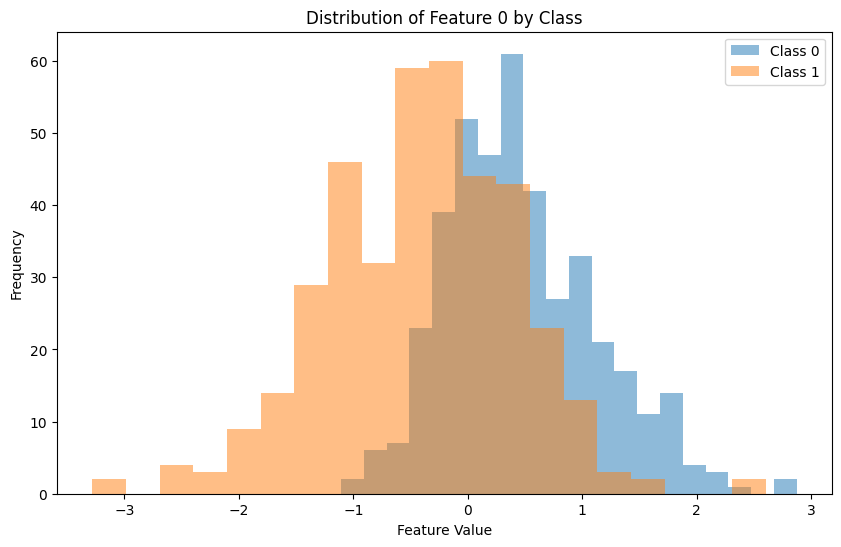

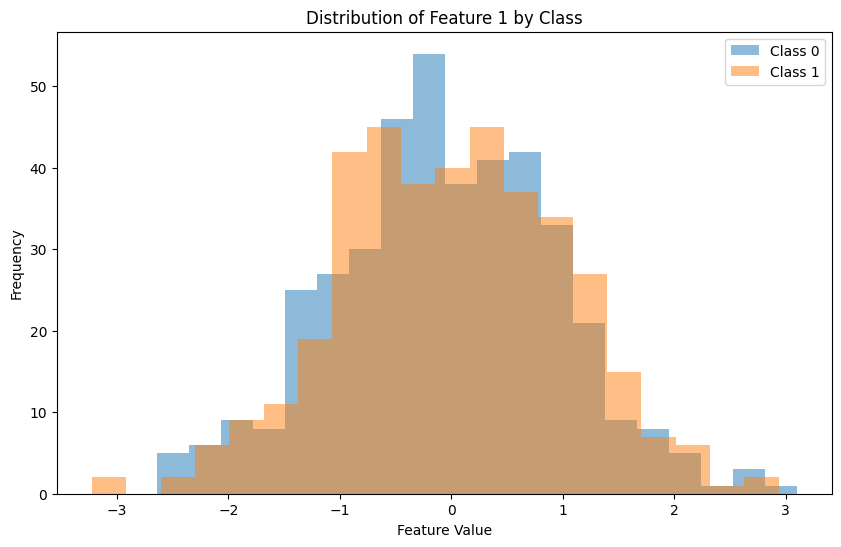

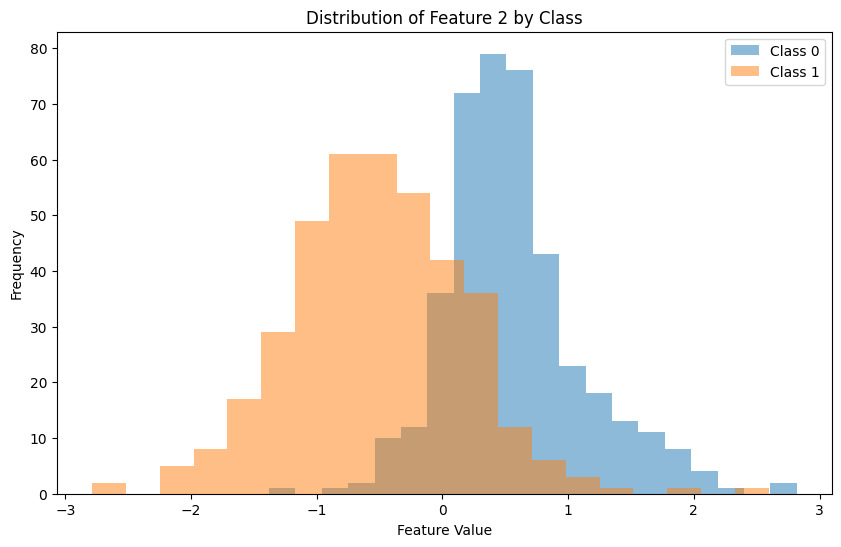

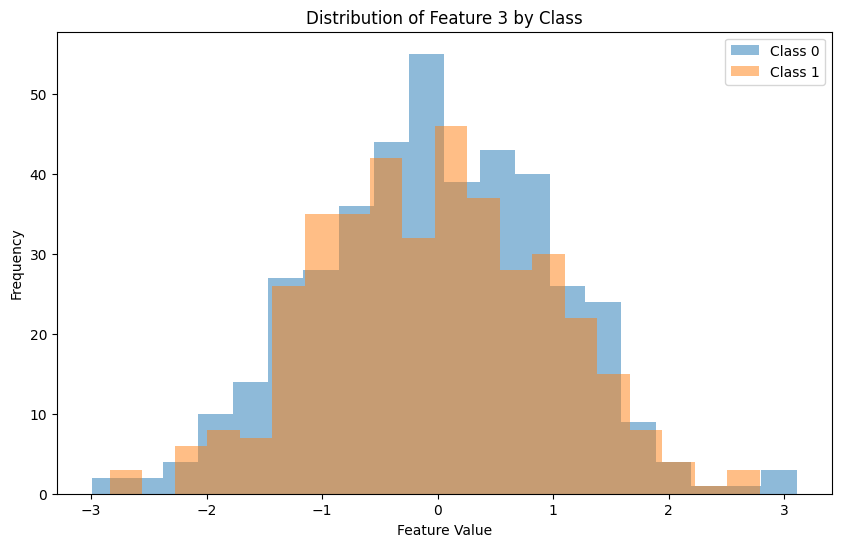

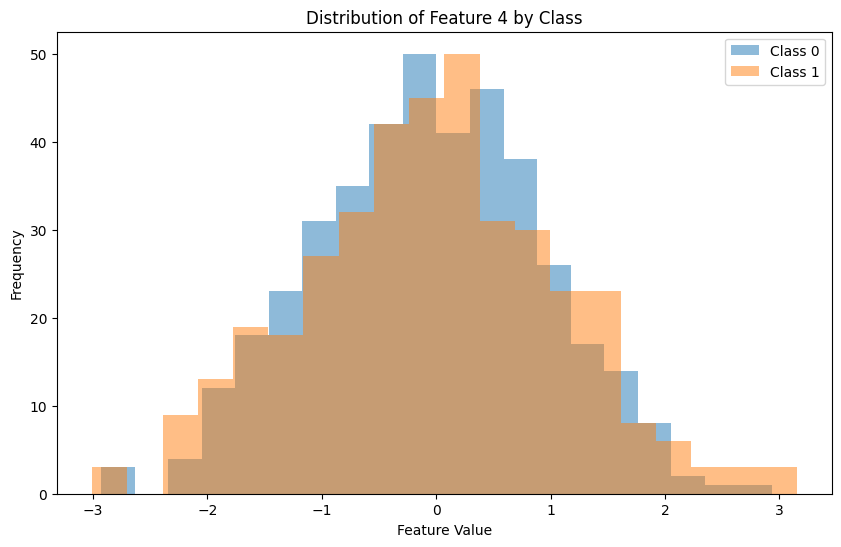

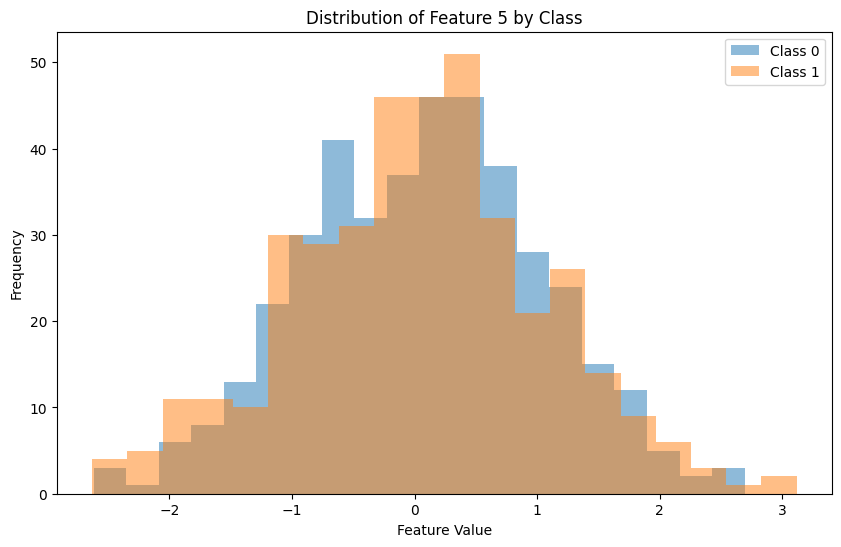

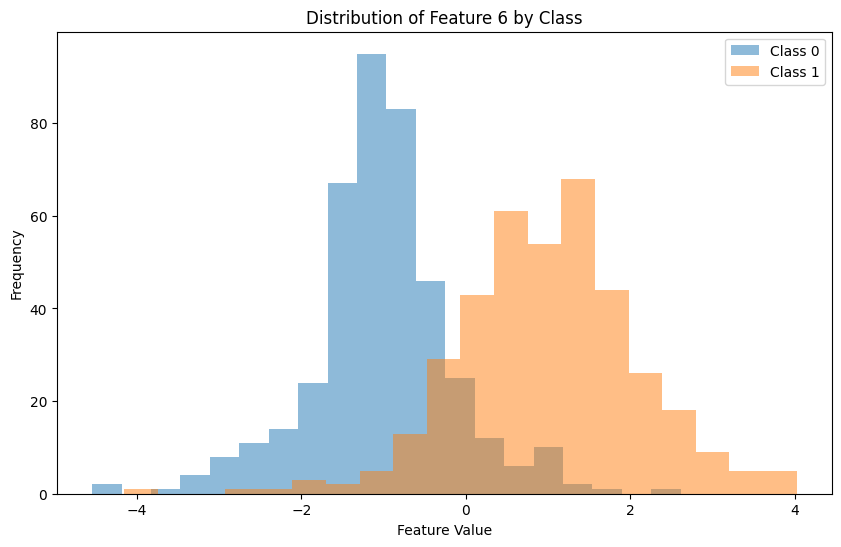

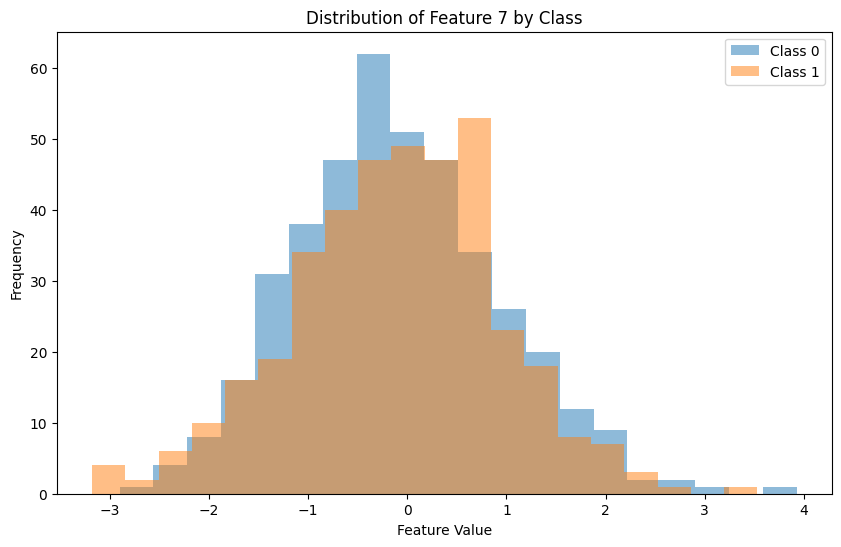

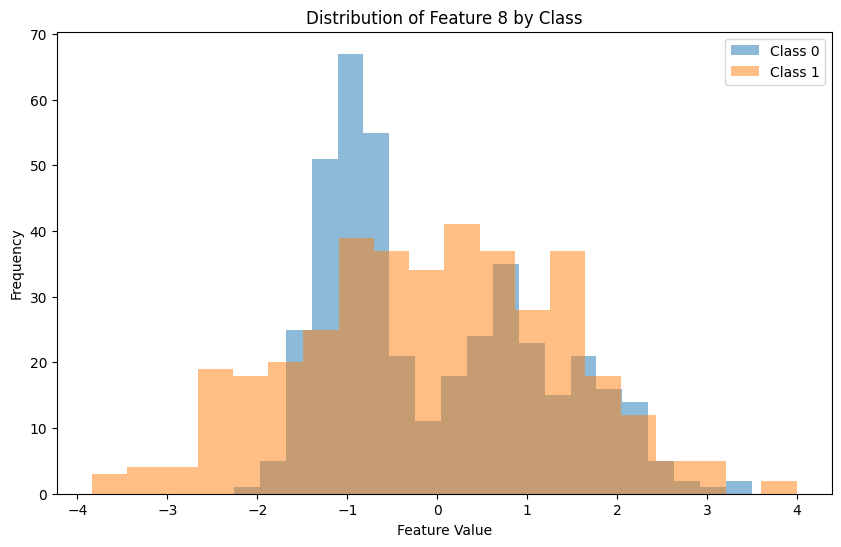

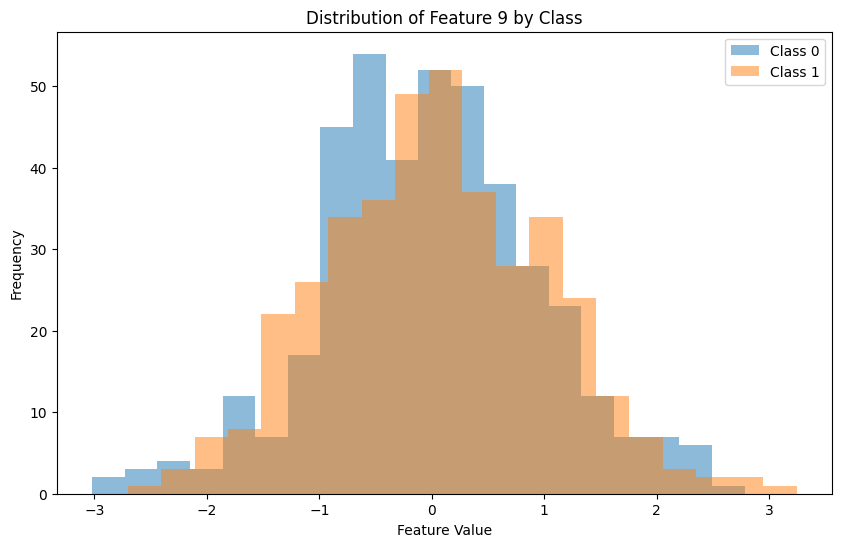

In [27]:
# Visualize distributions of features for class separation
for feature_idx in range(X.shape[1]):
    plot_feature_distribution(X_train, y_train, feature_idx)


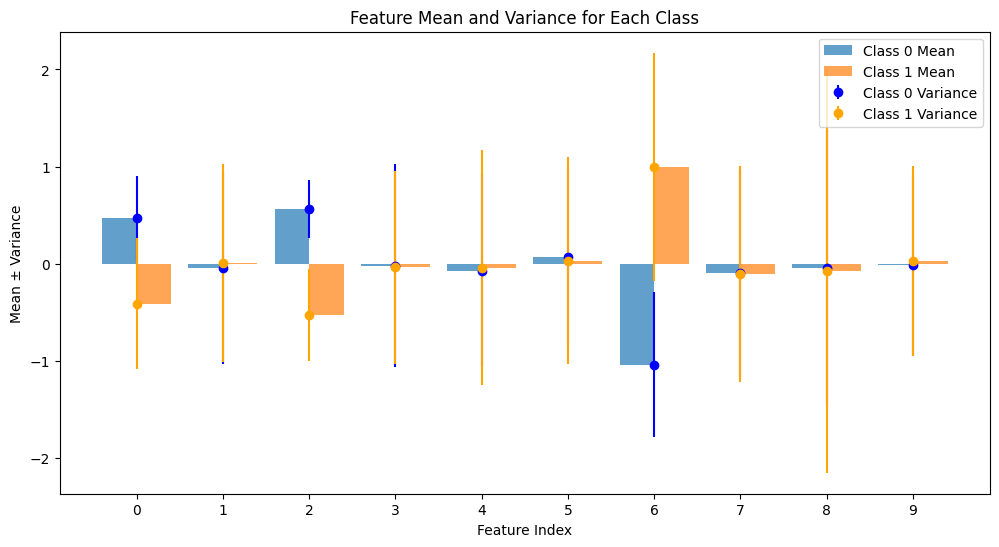

In [28]:
def plot_feature_importance(mean, var, feature_names=None):
    """
    Plots feature importance based on the NB mean and variance.

    Parameters:
    mean : Mean values of features each class
    var : Variance values of features each class
    feature_names : Feature names
    """
    n_features = mean.shape[1]
    x = np.arange(n_features)

    plt.figure(figsize=(12, 6))
    plt.bar(x - 0.2, mean[0], width=0.4, label="Class 0 Mean", alpha=0.7)
    plt.bar(x + 0.2, mean[1], width=0.4, label="Class 1 Mean", alpha=0.7)

    plt.errorbar(x, mean[0], yerr=var[0], fmt='o', color='blue', label="Class 0 Variance")
    plt.errorbar(x, mean[1], yerr=var[1], fmt='o', color='orange', label="Class 1 Variance")

    plt.xlabel("Feature Index")
    plt.ylabel("Mean ± Variance")
    plt.title("Feature Mean and Variance for Each Class")
    plt.xticks(x, feature_names if feature_names else range(n_features))
    plt.legend()
    plt.show()


plot_feature_importance(nb._mean, nb._var)


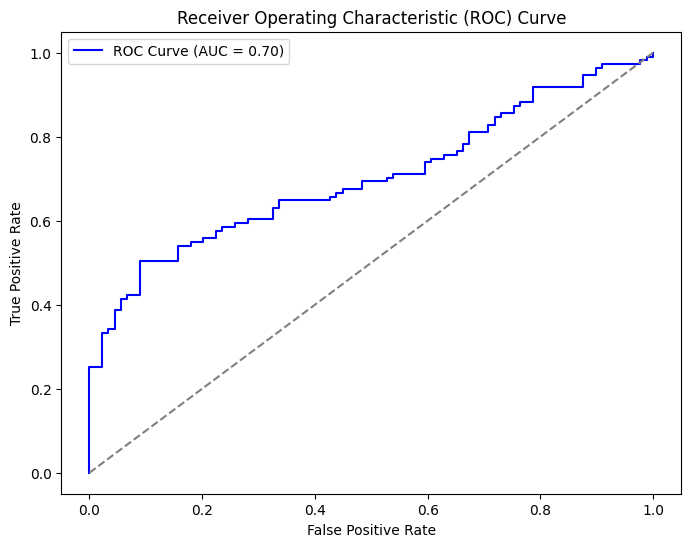

In [30]:
def plot_roc_curve(y_true, y_pred_proba):
    """
    Plot the ROC curve and compute the AUC score.

    Parameters:
    y_true : True class labels
    y_pred_proba : Predicted probability scores for positive class
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

# Convert predictions to probabilities
y_pred_proba = [max(nb._pdf(1, x)) for x in X_test]

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_proba)


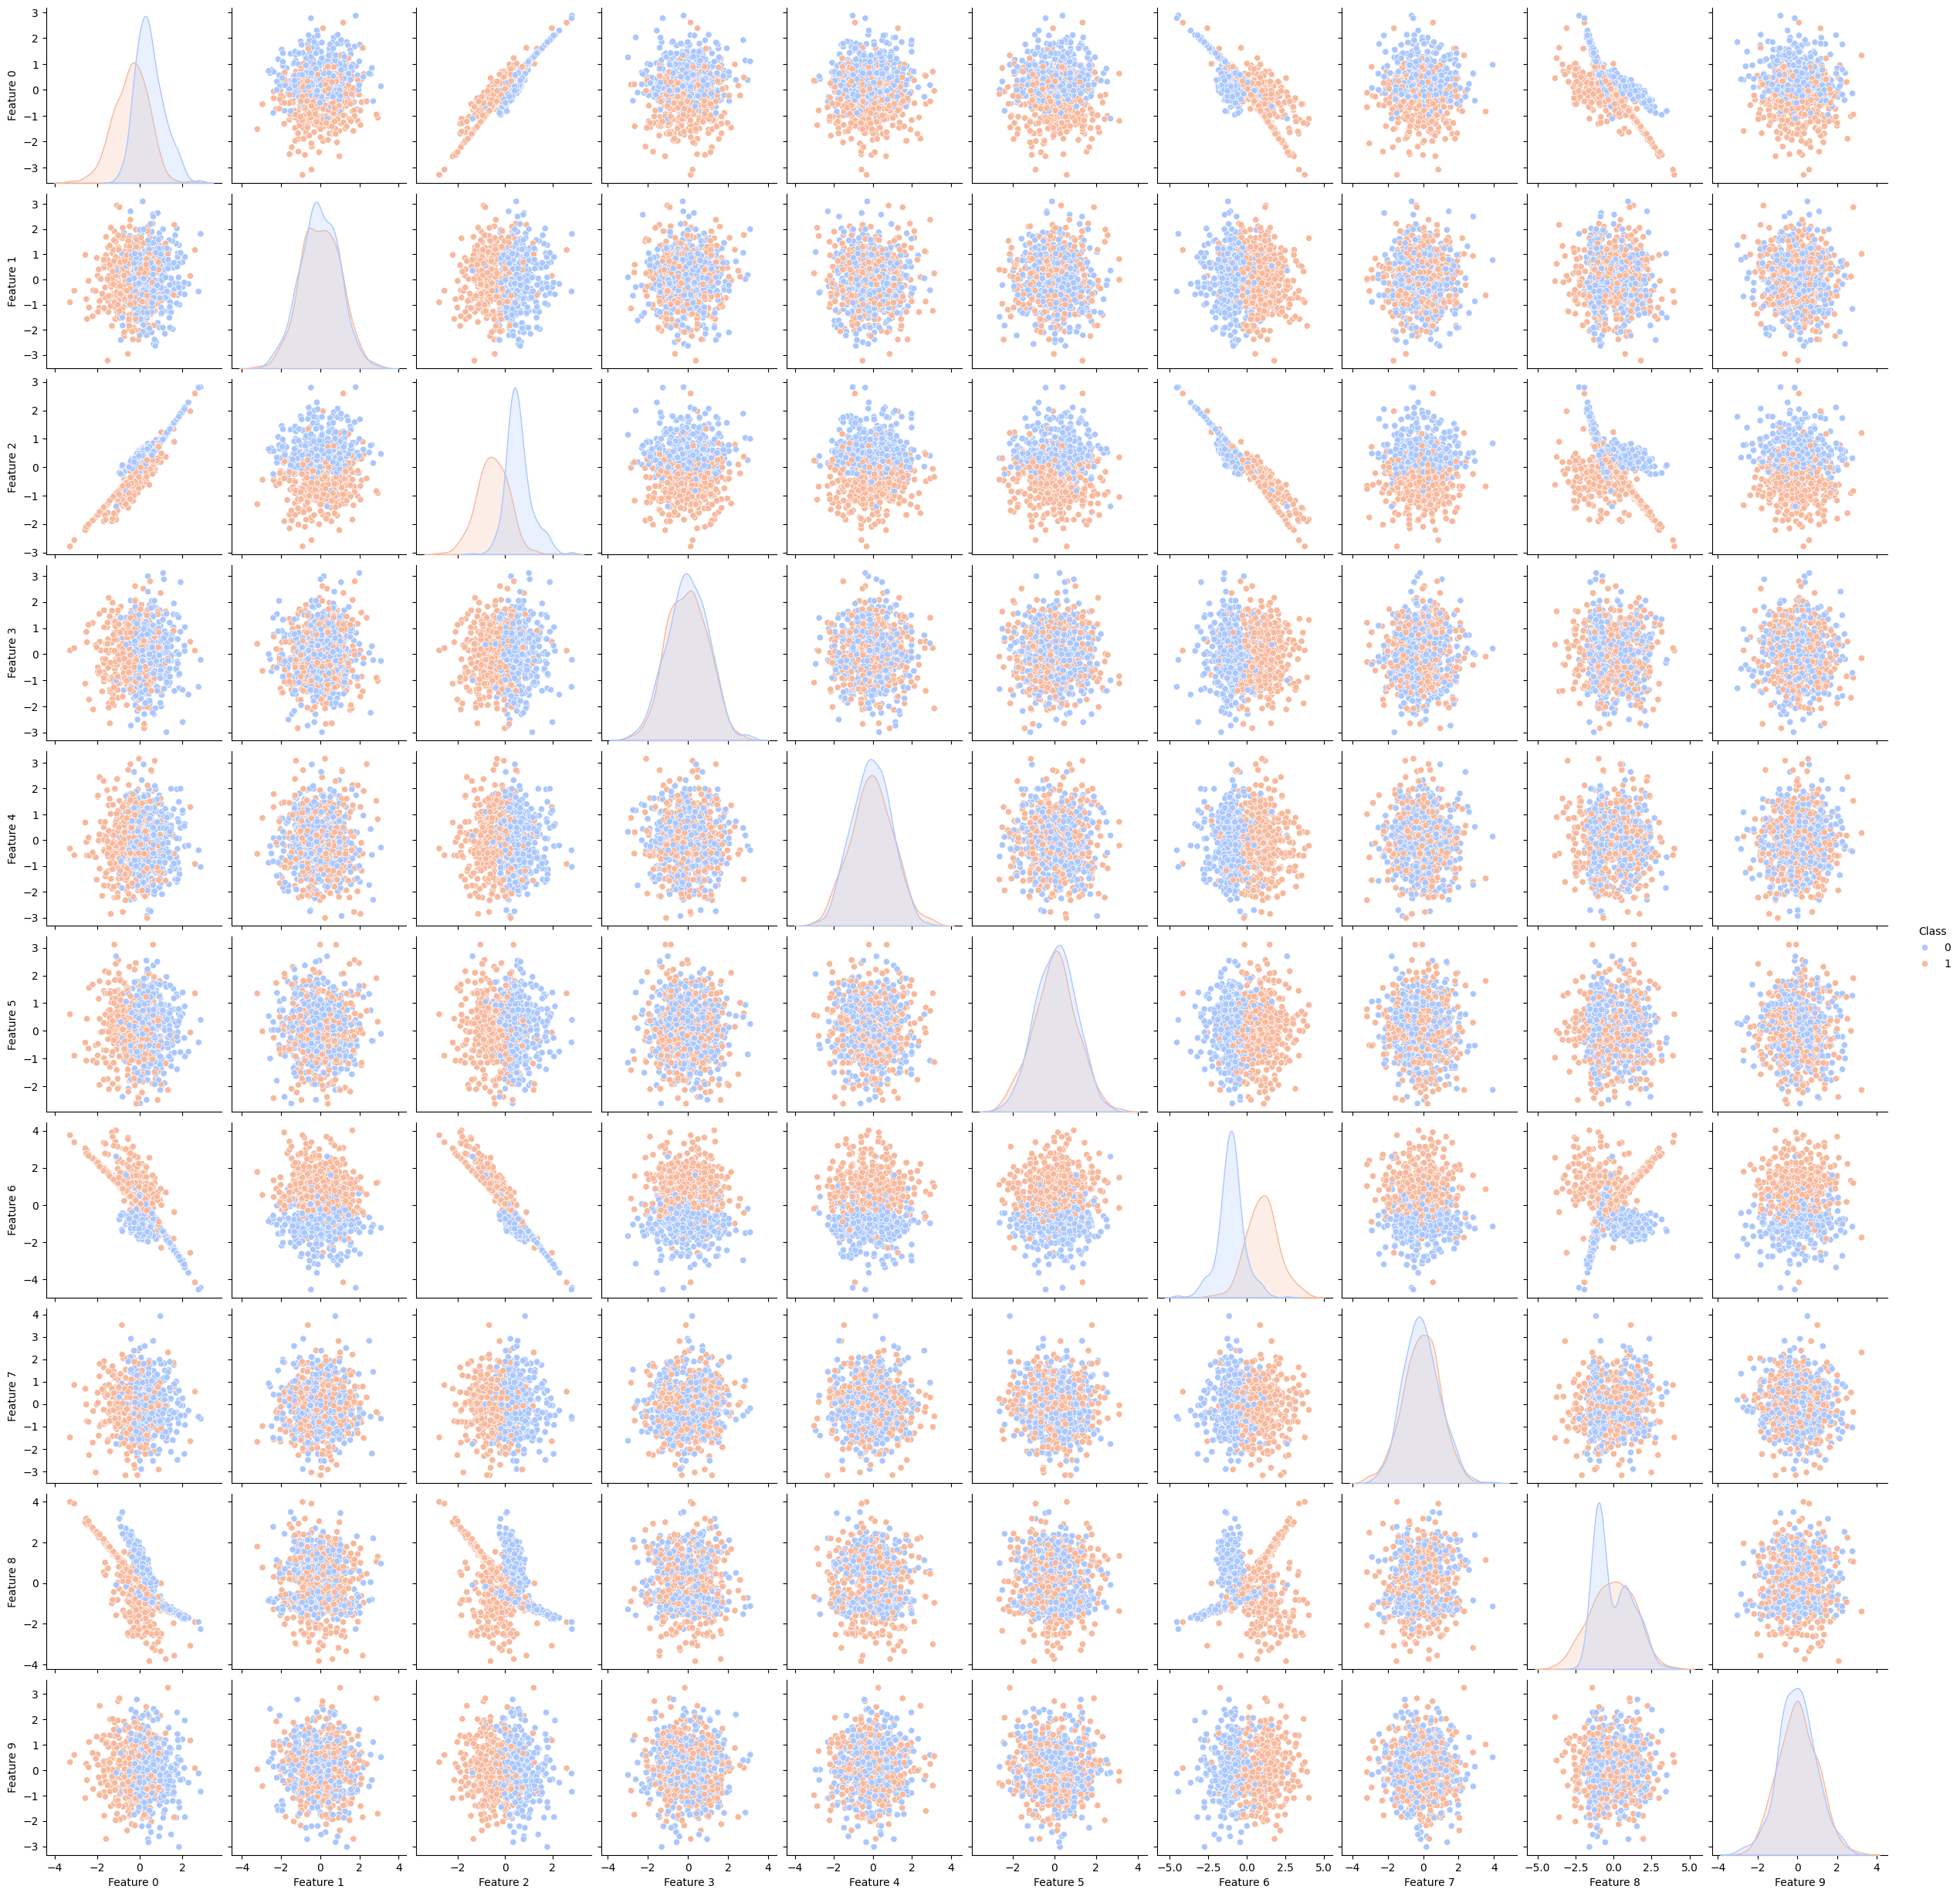

In [33]:
# Convert dataset to DataFrame for visualization
df = pd.DataFrame(X_train, columns=[f'Feature {i}' for i in range(X_train.shape[1])])
df['Class'] = y_train

# Pairplot visualization
sns.pairplot(df, hue='Class', diag_kind='kde', palette='coolwarm')
plt.show()


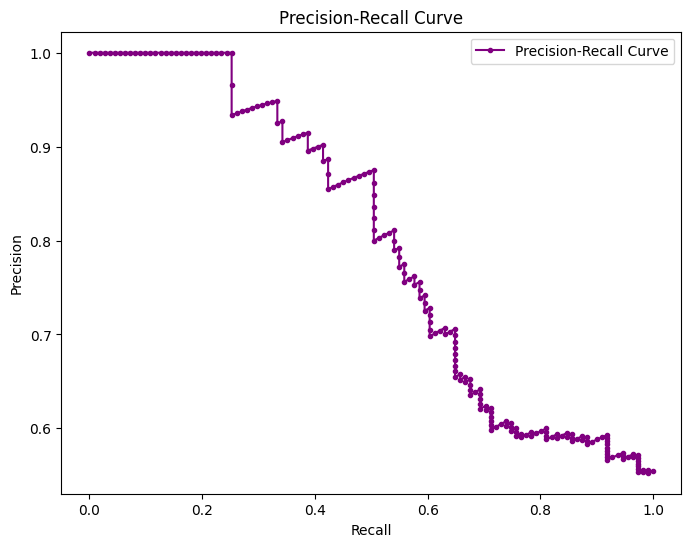

In [35]:
def plot_precision_recall_curve(y_true, y_pred_proba):
    """
    Plot Precision-Recall Curve.

    Parameters:
    y_pred_proba: Predicted probability scores for positive classes
    """
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', color='purple', label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

plot_precision_recall_curve(y_test, y_pred_proba)
